# Présence en cours

Depuis le 16 mars 2022, des données sur le nombre de L2 présents en cours de la licence Sprint ont été récoltées.  
On se propose ici d'étudier un peu plus en détails ces données et de voir si on peut observer certaines tendances apparaître.

## Sommaire

1. [Généralités](#Généralités)
2. [Présence selon l'heure](#Présence-selon-l'heure)
3. [Détails de chaque cours](#Détails-de-chaque-cours)
4. [Conclusion](#Conclusion)
5. [Pour aller plus loin](#Pour-aller-plus-loin)


## Généralités

Commençons par détailler le format des données récupérées :

| Nom de la colonne | Description |
| ----------------- | ----------- |
| Date | Date à laquelle le cours à eu lieu au format **aaaa-mm-jj hh:mm**|
| Cours | La référence du cours parmi : **PY215**, **PY222**, **PY404**, **PY421**, **PY423**, **PY531** |
| Type | Le type de cours parmi : **TD**, **TP**, **CM**, **Partiels** |
| Effectif | Le nombre de personnes présentes en cours |

Les références des cours sont les suivantes :

| Référence | Nom du cours |
| --- | --- |
| PY215 | Physique Expérimentale |
| PY222 | Modélisation Numérique en Physique |
| PY404 | Mécanique Avancée |
| PY421 | Ondes et Electromagnétisme |
| PY423 | Méthodes Mathématiques |
| PY531 | Astrophysique |

In [1]:
import pandas as pd # csv
import matplotlib.pyplot as plt # graphisme
import numpy as np # calcul vectoriel
import scipy.stats # fit gaussien
from scipy.optimize import curve_fit # fit global
import matplotlib.dates as mdates # gestion des dates

In [2]:
plt.rcParams["figure.figsize"] = (16, 9) # taille des graphes
plt.rcParams["font.size"] = 16 # taille police
plt.rcParams["axes.grid"] = True # affichage grille
plt.rcParams["figure.autolayout"] = True

# nom des cours
COURS = {
    "PY215": "Physique Expérimentale",
    "PY222": "Modélisation Numérique en Physique",
    "PY404": "Mécanique Avancée",
    "PY421": "Ondes et Electromagnétisme",
    "PY423": "Méthodes Mathématiques",
    "PY531": "Astrophysique",
}

Concrétement, on a cela :

In [3]:
# lecture csv
df = pd.read_csv("présence.csv", parse_dates=["Date"])

df.head()

,Date,Cours,Type,Effectif
0,2022-03-16 08:30:00,PY404,TD,10
1,2022-03-16 10:45:00,PY531,TD,11
2,2022-03-17 13:45:00,PY421,CM,8
3,2022-03-18 14:00:00,PY222,TP,15
4,2022-03-21 08:30:00,PY423,CM,8


Pour la suite, on va séparer le dataset en deux sous-dataset :
- une partie ne contiendra que les partiels
- l'autre contiendra tous les autres cours

En plottant l'intégralité des données, on obtient le graphique suivant :

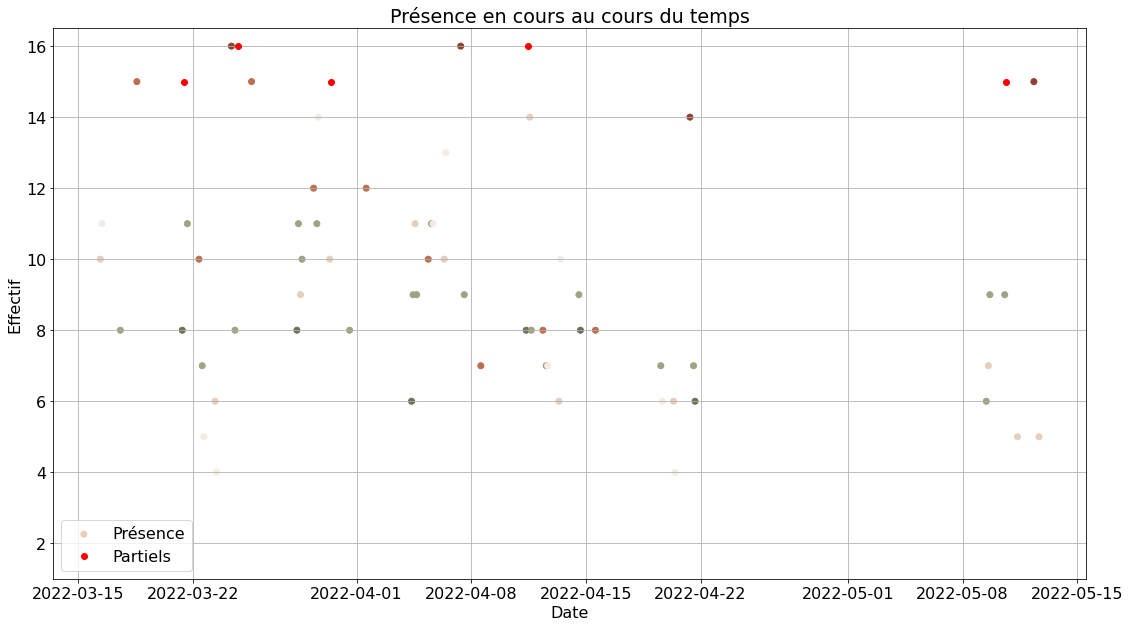

In [4]:
# CC ayant eu lieu durant le semestre
partiels = df[df["Type"] == "Partiels"]
# tous les cours hormis les CC
alls = df[df["Type"] != "Partiels"]

colors = alls["Cours"].map({
    "PY215": "#8E412E",
    "PY222": "#BA6F4D",
    "PY404": "#E6CEBC",
    "PY421": "#A2A182",
    "PY423": "#687259",
    "PY531": "#F4ECE2",
})

plt.scatter(alls["Date"], alls["Effectif"], c=colors, label="Présence")
plt.plot(partiels["Date"], partiels["Effectif"], "or", label="Partiels")
plt.xlabel("Date")
plt.ylabel("Effectif")
plt.ylim((1, 16.5))
plt.title("Présence en cours au cours du temps")
plt.legend()
plt.show()

La présence en cours fluctue beaucoup. Il ne semble pas y avoir de tendance globale particulière au premier coup d'oeil si ce n'est une légère baisse. On va donc devoir regarder plus en détails les données.

Démarrons en douceur en regardant la distribution de l'effectif.  
Comme certains cours sont obligatoires (notamment les TPs), nous allons séparer en deux graphes les données pour voir si il y a un impact.  
Un graphe portera donc sur la présence pour les cours non obligatoires et l'autre portera sur tous les cours (hors CC).

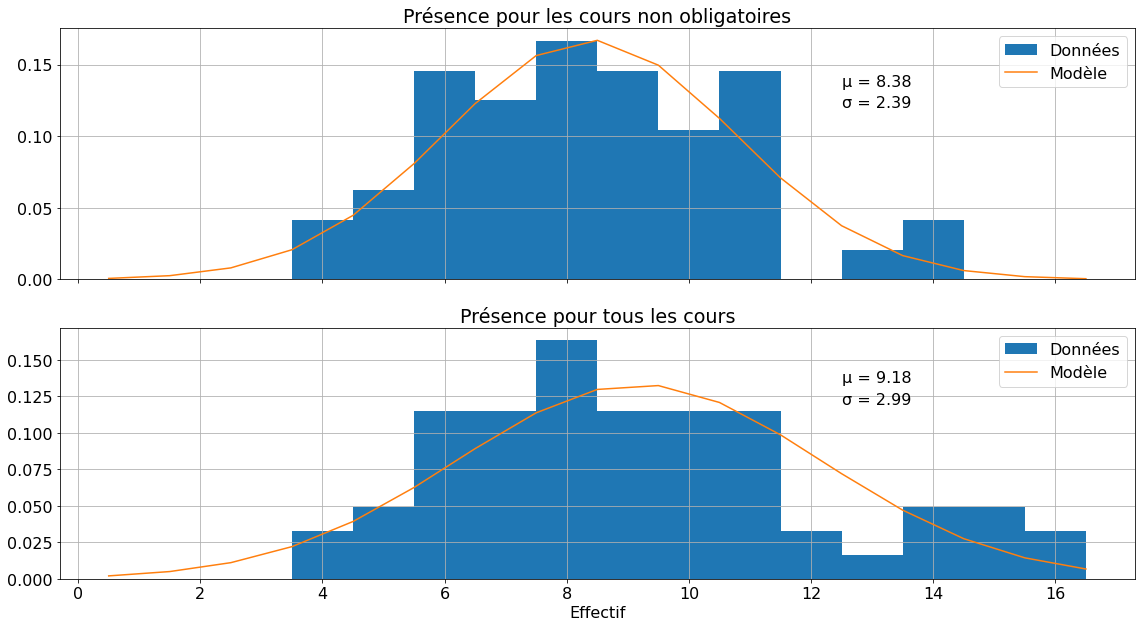

Nombre de cours obligatoires : 21.3%


In [5]:
# nombre de bins
BINS = np.arange(0.5, 17, 1)

fig, axs = plt.subplots(2, sharex=True)

# Présence pour les cours non obligatoires
facultatif = alls[(alls["Type"] != "TP") & (alls["Cours"] != "PY215")]
data = facultatif["Effectif"]

_, tmp, _ = axs[0].hist(data, bins=BINS, density=True, label="Données")

mu, sigma = scipy.stats.norm.fit(data)
best_fit_line = scipy.stats.norm.pdf(tmp, mu, sigma)

axs[0].plot(tmp, best_fit_line, label="Modèle")
axs[0].text(12.5, 0.135, f"\u03bc = {mu:.3}")
axs[0].text(12.5, 0.12, f"\u03c3 = {sigma:.3}")
axs[0].set_title("Présence pour les cours non obligatoires")
axs[0].legend()

# Présence pour tous les cours
data = alls["Effectif"]

_, tmp, _ = axs[1].hist(data, bins=BINS, density=True, label="Données")

mu, sigma = scipy.stats.norm.fit(data)
best_fit_line = scipy.stats.norm.pdf(tmp, mu, sigma)

axs[1].plot(tmp, best_fit_line, label="Modèle")
axs[1].text(12.5, 0.135, f"\u03bc = {mu:.3}")
axs[1].text(12.5, 0.12, f"\u03c3 = {sigma:.3}")
axs[1].set_title("Présence pour tous les cours")
axs[1].legend()

plt.xlabel("Effectif")
plt.show()

nb_cours_percent = (len(alls["Effectif"]) - len(facultatif["Effectif"])) / len(alls["Effectif"]) * 100
print(f"Nombre de cours obligatoires : {nb_cours_percent:.3}%")

Dans le cas des cours non obligatoires, on se rapproche assez d'une gaussienne. La nombre d'étudiants en cours est d'environ $8 \pm 2$.

Si l'on rajoute les cours obligatoires (qui représente 21% de l'ensemble des cours), la gaussienne s'aplatit et se déplace vers la droite. On obtient alors un nombre d'étudiants d'à peu près $9 \pm 3$ présents par cours.

## Présence selon l'heure

On s'intéresse maintenant à l'impact qu'a l'heure du cours sur l'effectif présent.

Il y a six horaires différentes à laquel un cours peut commencer :
- 08h30
- 09h00
- 10h45
- 13h45
- 14h00
- 16h00

Il est cependant à noter que les cas **09h00** et **14h00** sont des cas particuliers car ils ne correspondent qu'aux cours de *Modélisation Numérique en Physique*, obligatoires pour certains groupes au début du semestre puis facultatifs.

Si on sépare encore une fois les cours obligatoires de ceux qui ne le sont pas, on obtient les graphes suivants :

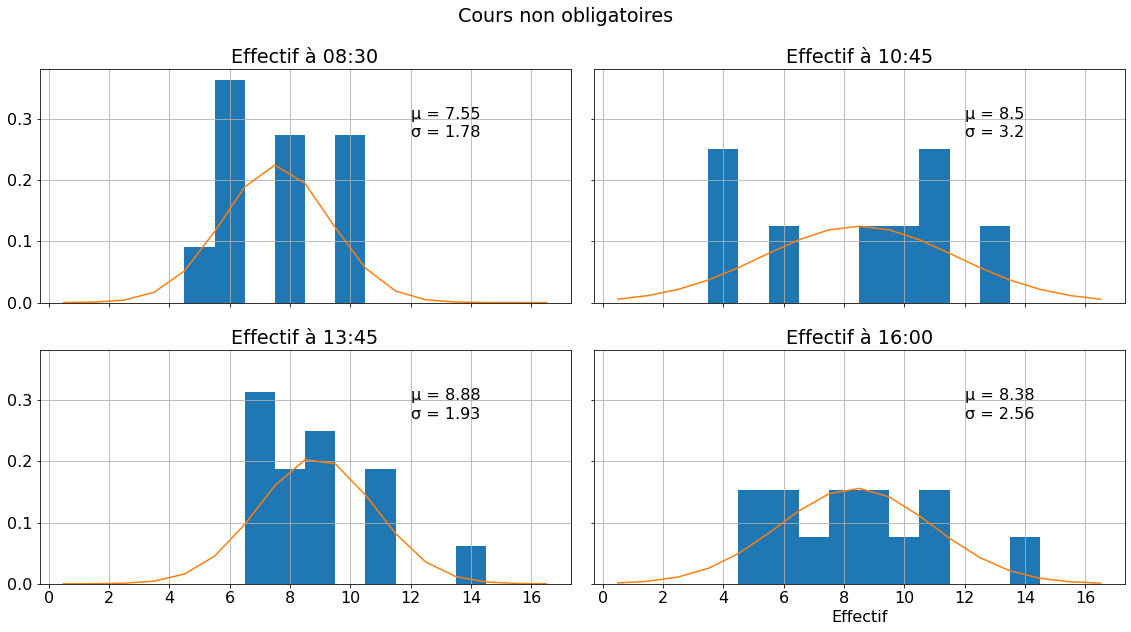

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'

# TODO: calculer corrélation heure-effectif

facultatif["Heure_Min"] = facultatif['Date'].dt.strftime("%H:%M")
hour_grouped = facultatif.groupby("Heure_Min")

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

for (name, data), ax in zip(hour_grouped, axs.flatten()):
    _, tmp, _ = ax.hist(data["Effectif"], bins=BINS, density=True)

    mu, sigma = scipy.stats.norm.fit(data["Effectif"])
    best_fit_line = scipy.stats.norm.pdf(tmp, mu, sigma)

    ax.plot(tmp, best_fit_line, label="Modèle")
    ax.text(12, 0.3, f"\u03bc = {mu:.3}")
    ax.text(12, 0.27, f"\u03c3 = {sigma:.3}")
    ax.set_title(f"Effectif à {name}")

fig.suptitle("Cours non obligatoires")
plt.xlabel("Effectif")
plt.show()

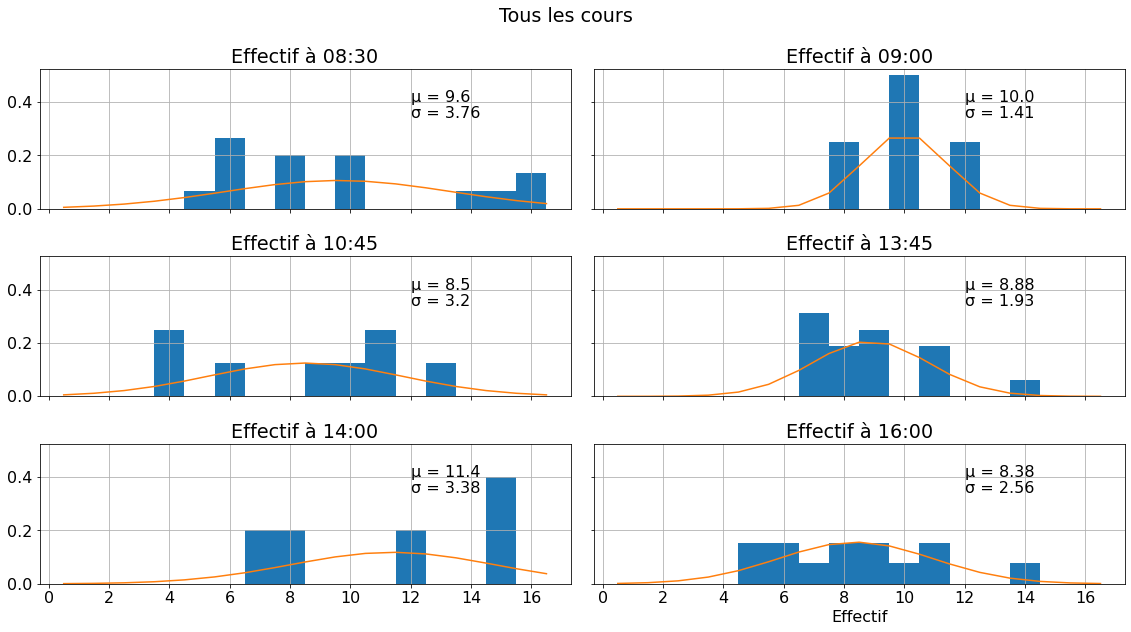

In [7]:
alls["Heure_Min"] = alls['Date'].dt.strftime("%H:%M")
hour_grouped = alls.groupby("Heure_Min")

fig, axs = plt.subplots(3, 2, sharex=True, sharey=True)

for (name, data), ax in zip(hour_grouped, axs.flatten()):
    _, tmp, _ = ax.hist(data["Effectif"], bins=BINS, density=True)

    mu, sigma = scipy.stats.norm.fit(data["Effectif"])
    best_fit_line = scipy.stats.norm.pdf(tmp, mu, sigma)

    ax.plot(tmp, best_fit_line, label="Modèle")
    ax.text(12, 0.4, f"\u03bc = {mu:.3}")
    ax.text(12, 0.34, f"\u03c3 = {sigma:.3}")
    ax.set_title(f"Effectif à {name}")

fig.suptitle("Tous les cours")
plt.xlabel("Effectif")
plt.show()

On remarque plusieurs choses :
- pour les cours non obligatoires, le cours de 08h30 a une moyenne et un écart-type bien en dessous de ce qui a été trouvé plus tôt
- si on regarde pour tous les cours, on déduit que les cours obligatoires se déroulent à 08h30, seule horaire à voir sa moyenne changée par rapport aux graphes précédents (si on ne prend pas en compte les cours de 09h00 et 14h00)

L'heure influerait donc bien sur la présence en cours. Néanmoins, il n'y a que deux jours dans la semaine (lundi et mercredi) où nous commençons à ces horaires (hors cours obligatoires), ce qui n'est pas forcément représentatif car cela peut venir des cours effectués à ces heures.

## Détails de chaque cours

Nous allons donc maintenant regarder chaque cours plus en détails.

Affichons la répartition de chaque cours.

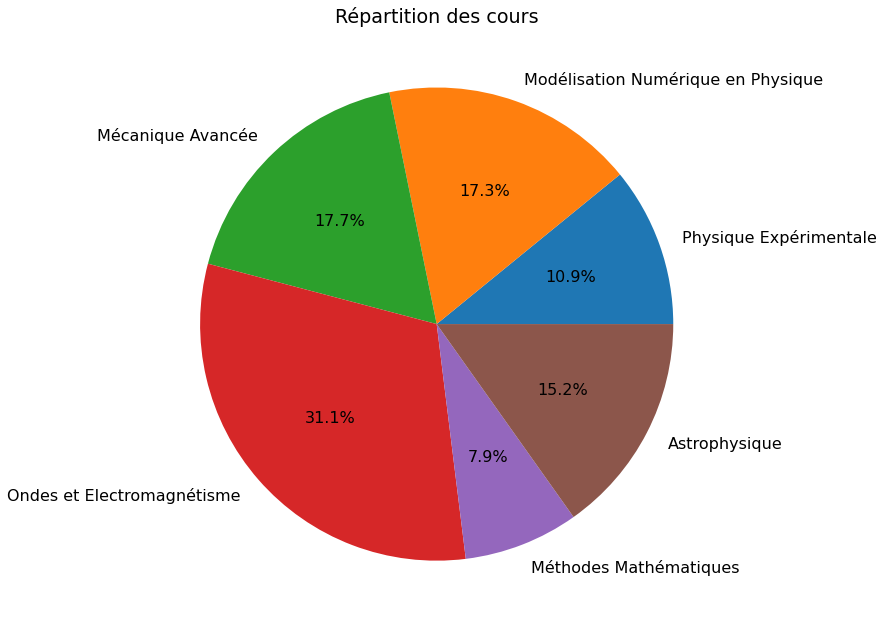

In [8]:
# groupe par cours
cours = alls.groupby(["Cours"])
# somme les cours pour calculer la répartition
summed = cours.sum()

plt.pie(summed.values.flatten(), labels=summed.index.map(COURS), autopct='%1.1f%%')
plt.title("Répartition des cours")
plt.show()

On peut maintenant regarder l'effectif présent pour chaque matière.

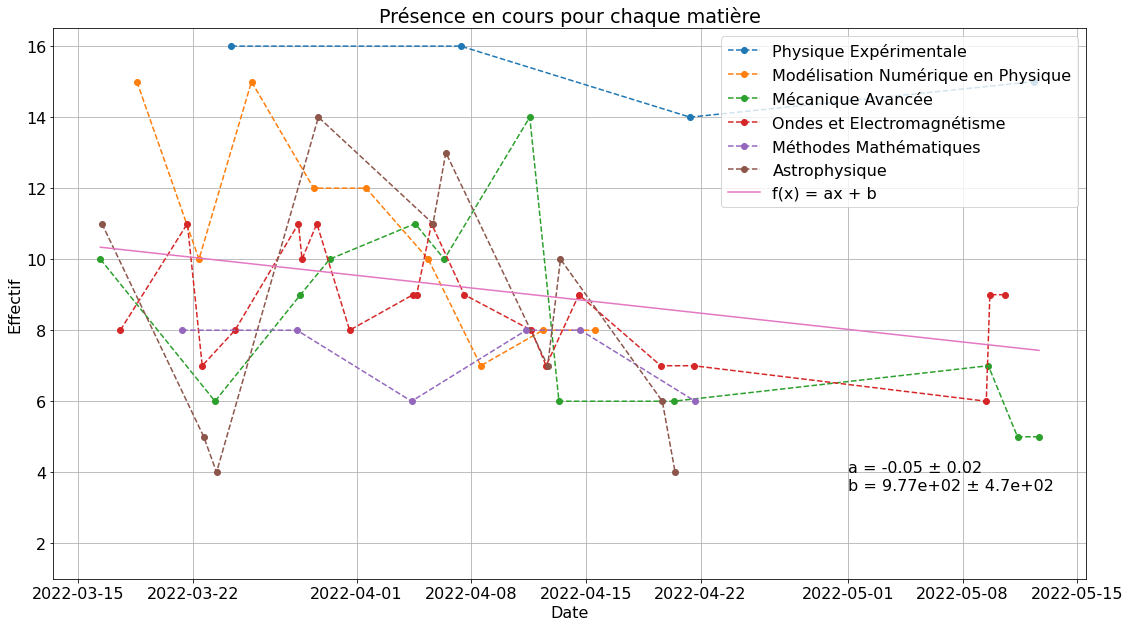

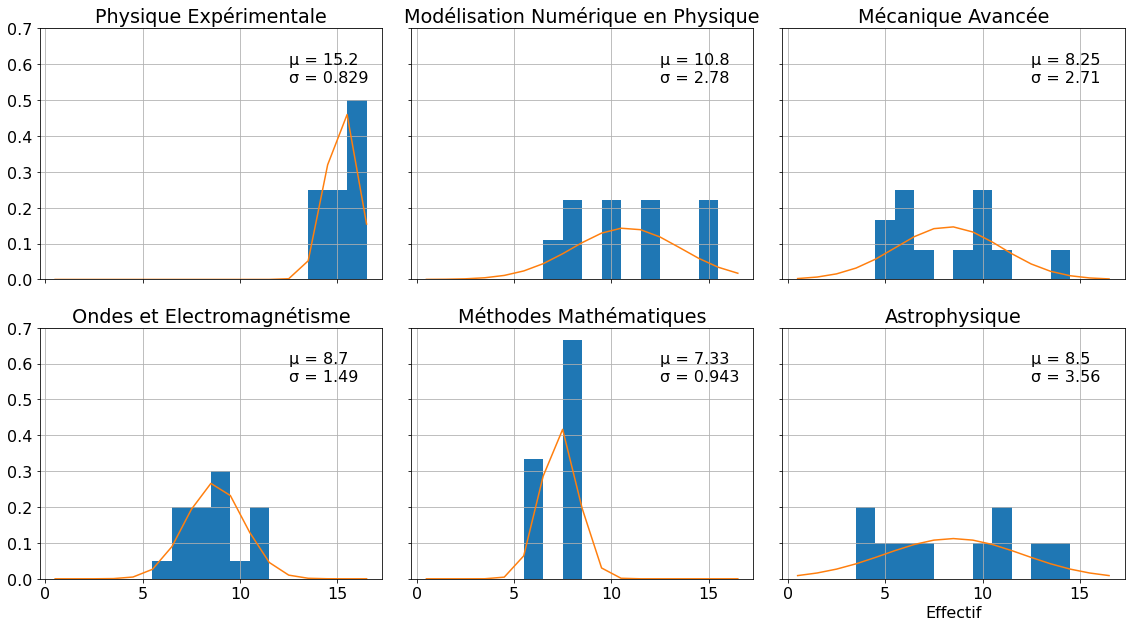

In [9]:
def linfit(x, a, b):
    """Fonction affine pour le fit"""
    return a * x + b

for name, data in cours:
    plt.plot(data["Date"], data["Effectif"], "o--", label=COURS[name])

x = mdates.date2num(alls["Date"].values) # convertit date en float pour le fit
popt, pcov = curve_fit(linfit, x, alls["Effectif"])
perr = np.sqrt(np.diag(pcov))

plt.plot(alls["Date"], linfit(x, *popt), label="f(x) = ax + b")
plt.text(np.datetime64("2022-05-01"), 4, f"a = {popt[0]:.1} \u00b1 {perr[0]:.1}")
plt.text(np.datetime64("2022-05-01"), 3.5, f"b = {popt[1]:.3} \u00b1 {perr[1]:.2}")

plt.xlabel("Date")
plt.ylabel("Effectif")
plt.ylim((1, 16.5))
plt.title("Présence en cours pour chaque matière")
plt.legend()
plt.show()

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

for (name, data), ax in zip(cours, axs.flatten()):
    _, tmp, _ = ax.hist(data["Effectif"], density=True, bins=BINS)
    
    mu, sigma = scipy.stats.norm.fit(data["Effectif"])
    best_fit_line = scipy.stats.norm.pdf(tmp, mu, sigma)

    ax.plot(tmp, best_fit_line, label="Modèle")
    ax.text(12.5, 0.6, f"\u03bc = {mu:.3}")
    ax.text(12.5, 0.55, f"\u03c3 = {sigma:.3}")
    ax.set_title(COURS[name])

plt.xlabel("Effectif")
plt.show()

La présence en cours varie selon les cours. On voit cependant une tendance globale à la baisse depuis le début du dataset.

Etant un cours obligatoire, la *Physique Expérimentale* ne montre pas vraiment de surprise avec un faible écart-type et une participation proche du maximum, modulée par quelques absences pouvant être expliquées par des maladies ou autres problèmes personnels.

Pour la *Modélisation Numérique en Physique*, pas grand chose à dire à part que la présence diminue, en grande partie car les cours deviennent facultatifs ce qui étale la courbe.

En *Mécanique Avancée*, l'écart-type est assez grand bien que la présence soit dans la moyenne des cours non obligatoires. Il semble qu'il y est deux pics de présence. L'étude des différents types de cours (**CM** ou **TD**) pourrait nous donner plus de détails.

*Ondes et Electromagnétismes* n'est pas le cours le plus rempli mais la participation reste relativement constante et on a ce qui ressemble le plus à une gaussienne.

On voit que *Méthodes Mathématiques* est le cours avec la présence la plus faible mais avec un nombre d'étudiants stable. Il est à noter que nous n'avions qu'un seul cours le lundi matin à 08h30, il est donc difficile de savoir si la faible présence est dûe à l'heure, la matière ou les deux (bien que l'écart-type plus faible que pour les cours non obligatoires aurait tendance à faire penser que la matière joue un rôle plus important).

Pour finir, l'*Astrophysique* est le cours avec le plus gros écart de présence bien que dans la moyenne de présence. 

Enfin, on peut recapituler tout cela grâce au tableau suivant (avec en plus les données par type de cours):

In [10]:
# on groupe tous les cours par type, hormis les partiels
group = alls.groupby(["Cours", "Type"])
group.describe()

Effectif                                                    
              count       mean       std   min    25%   50%   75%   max
Cours Type                                                             
PY215 TP        4.0  15.250000  0.957427  14.0  14.75  15.5  16.0  16.0
PY222 TP        9.0  10.777778  2.948634   7.0   8.00  10.0  12.0  15.0
PY404 CM        5.0   9.200000  3.492850   5.0   7.00   9.0  11.0  14.0
      TD        7.0   7.571429  2.299068   5.0   6.00   6.0  10.0  10.0
PY421 CM        9.0   8.333333  1.414214   6.0   8.00   8.0   9.0  11.0
      TD       11.0   9.000000  1.612452   7.0   7.50   9.0  10.5  11.0
PY423 CM        4.0   8.000000  0.000000   8.0   8.00   8.0   8.0   8.0
      TD        2.0   6.000000  0.000000   6.0   6.00   6.0   6.0   6.0
PY531 CM        5.0   8.600000  3.781534   5.0   6.00   7.0  11.0  14.0
      TD        5.0   8.400000  4.159327   4.0   4.00  10.0  11.0  13.0

Sans trop s'étaler, on voit que certaines informations viennent corréler les graphes plus haut.  
Par exemple, on peut voir que pour *Mécanique Avancée* (**PY404**), il y a bien deux pics avec un taux de participation plus faible lors des TDs, TDs qui ont lieu le mercredi matin à 08h30.

## Conclusion

Il semblerait que l'heure et la matière aient bien un impact sur la présence en cours même si il plutôt difficile de savoir si les deux sont liés dans certains cas.  
De plus, on note une lente baisse de participation tout au long du semestre.